#Daffa Rizki Rizaly - 2301931251

#Import Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools


* **tensorflow** as a library of machine learning .
* **Keras** is an API for deep learning.
* **Sequential** is the type of model that keras used.
* **Conv2D** used to create a layer convulutional 2D. On this dataset , I use the 2D because the dataset is a 2D data
* **Flatten** used to change the 2dimensional be 1 linear vector.
* **Adam** is the optimizer that I use because it has the best performance.

* **train_test_split** used for splitting the data into a validation set
* **StandardScaler** used for data normalization features for enhanced results.
* **Keras Dataset CIFAR** used to retrieve the dataset cifar
* **numpy** is used for array manipulation
* **matplolib.pyplot** to visualize data with graphs
* **confusion matrix and classification report** for model evaluation
* **itertools** to iterate

#Data Preprocessing

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

we are using the cifar10 load data to import the dataset.

In [ ]:
classes = ["automobile","cat","dog","truck"]

Make classes list for indentifying labels.

In [ ]:
#Making new x_train and y_train with 4 classes
y = []
x = []
index =0
for i in y_train:
    if np.any(i == 1):
      y.append(0)
      x.append(x_train[index])
    elif i == 3:
      y.append(1)
      x.append(x_train[index])
    elif i == 5:
      y.append(2)
      x.append(x_train[index])
    elif i == 9:
      y.append(3)
      x.append(x_train[index])
    index= index +1
x_train = np.array(x)
y_train = np.array(y)

In [ ]:
#Making new x_test and y_test with 4 classes
y1 = []
x1 = []
index =0
for i in y_test:
    if np.any(i == 1):
      y1.append(0)
      x1.append(x_test[index])
    elif i == 3:
      y1.append(1)
      x1.append(x_test[index])
    elif i == 5:
      y1.append(2)
      x1.append(x_test[index])
    elif i == 9:
      y1.append(3)
      x1.append(x_test[index])
    index= index +1
x_test = np.array(x1)
y_test = np.array(y1)

This dataset has 10 classes but we only need 4 classes that is ["automobile","cat","dog","truck"]. Therefore we will loop for every y_train and y_test and check if the value is equal as 1,3,5,9 so we will append 0,1,2,3 respectively.

In [ ]:
#Normalize Dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

we will normalize the data by dividing by 255. so the x will contain values between 1-0. Normalizing the data will improve the performance of the model.

In [ ]:
y_test

array([1, 0, 1, ..., 1, 2, 0])

In [ ]:
# one hot encode target values
y_train = to_categorical(y_train,4)
y_test1 = to_categorical(y_test,4)

we will use keras to_categorical to onehotencoded the labels.

In [ ]:
#1
model = Sequential()

model.add(Conv2D(16,kernel_size=3, activation="relu", input_shape=[32,32,3]))
model.add(Conv2D(32,kernel_size=3, activation="relu"))
model.add(Conv2D(64,kernel_size=3, activation="relu"))
model.add(Flatten()) 
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

I created the model as written in the question, "The size of the input is (32x32x3) and the suggested architecture of your CNN is 
as follows: Conv(16,3x3), Relu, Conv(32,3x3), Relu, Conv(64,3x3), 2FC, and Softmax(4)."

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense (Dense)               (None, 128)               5537920   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 5,562,020
Trainable params: 5,562,020
Non-

In [ ]:
model.compile(optimizer= Adam(lr=0.001),
          loss='categorical_crossentropy',  
          metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


we will compile the model using Categorical crossentropy to count the loss as the task is  a multi-class, single-label prediction. For the optimizer, I'll use adam as adam is well-perfoming optimizer.

In [ ]:
model.fit(x_train, y_train,
                    epochs=30)

Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.6194 - accuracy: 0.7239
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.4940 - accuracy: 0.7858
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3602 - accuracy: 0.8507
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2210 - accuracy: 0.9126
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1210 - accuracy: 0.9552
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0764 - accuracy: 0.9740
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0496 - accuracy: 0.9841
Epoch 8/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0448 - accuracy: 0.9847
Epoch 9/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0391 - accuracy: 0.9867
Epoch 10/30
625/625 [==============================] - 3s 4ms/step - loss: 0.0340 - accuracy: 0.9889

#Evaluation

In [ ]:
# evaluate the keras model
score = model.evaluate(x_test, y_test1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

125/125 [==============================] - 0s 3ms/step - loss: 2.3496 - accuracy: 0.7408
Test loss: 2.3495681285858154
Test accuracy: 74.07500147819519


As shown above, the model has 74% accuarcy and 2.34 loss. The test loss is above 1 , it shows that the model is overfitted.

In [ ]:
y_pred = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred, axis = 1) 

we use the argmax to compute as the labels.

#Confusion Matrix

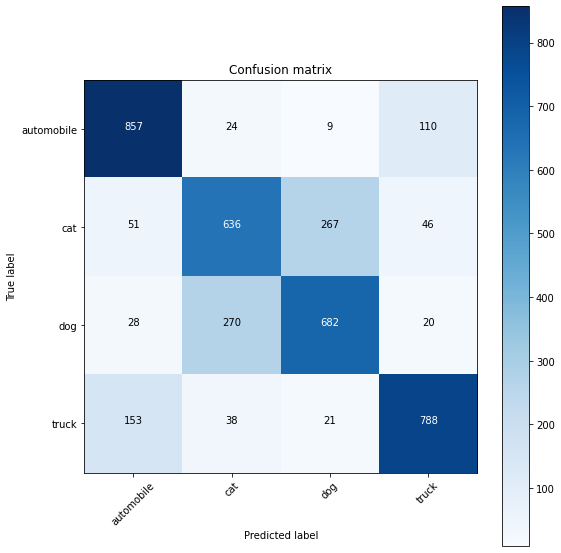

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes = classes)

As shown above,The model can differentiate between animals and vehicles fairly good. But in the animal section, it still struggles in determining between cats and dogs with more 250 false prediction respectively.

#Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.66      0.64      0.65      1000
           2       0.70      0.68      0.69      1000
           3       0.82      0.79      0.80      1000

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



As shown in the classification report, the automobile is the best class for the model to classify, followed by truck , dog and cat.

#Conclusion
By doing this project, I can conclude than the model is good with accuracy of 74% but as shown in test loss, the model is overfitted and can be fixed by reducing the network layers and adding dropout layer.